Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer ,so here we will be building churn prediction model to predict whether the churn is true or false. So here we will make use of the Logistic regression and other classification model to check which model suits best for our analysis.

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('churn.csv')

In [4]:
df.shape

(1199, 21)

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#so here will do a data cleanse process to remove the irrelevant columns

In [7]:
df.drop('phone number',axis=1,inplace=True)

In [8]:
df.drop('area code',axis=1,inplace=True)

In [9]:
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df.shape

(1199, 19)

In [11]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
#to check data types of the columns

In [13]:
df.dtypes

state                      object
account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [14]:
df.info()              #we can see from the below that no null value is present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   1199 non-null   object 
 1   account length          1199 non-null   int64  
 2   international plan      1199 non-null   object 
 3   voice mail plan         1199 non-null   object 
 4   number vmail messages   1199 non-null   int64  
 5   total day minutes       1199 non-null   float64
 6   total day calls         1199 non-null   int64  
 7   total day charge        1199 non-null   float64
 8   total eve minutes       1199 non-null   float64
 9   total eve calls         1199 non-null   int64  
 10  total eve charge        1199 non-null   float64
 11  total night minutes     1199 non-null   float64
 12  total night calls       1199 non-null   int64  
 13  total night charge      1199 non-null   float64
 14  total intl minutes      1199 non-null   

In [15]:
#converting catagorical to numerical value

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
a=['state','international plan','voice mail plan','churn']

In [19]:
for i in a:
    df[i]=le.fit_transform(df[i])

In [20]:
df.dtypes

state                       int32
account length              int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [21]:
# now we will divide the dataset in x and y(target variable)

In [22]:
x=df.drop('churn',axis=1)

In [23]:
x.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [24]:
x.shape

(1199, 18)

In [25]:
y=df['churn'].values

In [26]:
y=y.reshape(-1,1)
y.shape

(1199, 1)

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   1199 non-null   int32  
 1   account length          1199 non-null   int64  
 2   international plan      1199 non-null   int32  
 3   voice mail plan         1199 non-null   int32  
 4   number vmail messages   1199 non-null   int64  
 5   total day minutes       1199 non-null   float64
 6   total day calls         1199 non-null   int64  
 7   total day charge        1199 non-null   float64
 8   total eve minutes       1199 non-null   float64
 9   total eve calls         1199 non-null   int64  
 10  total eve charge        1199 non-null   float64
 11  total night minutes     1199 non-null   float64
 12  total night calls       1199 non-null   int64  
 13  total night charge      1199 non-null   float64
 14  total intl minutes      1199 non-null   

In [28]:
x.describe()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,25.048374,100.123436,0.100083,0.286072,8.358632,181.752377,100.397832,30.898407,199.286906,100.015013,16.939575,199.726606,100.016681,8.987731,10.221601,4.541284,2.760367,1.542118
std,14.874017,40.120309,0.300236,0.452112,13.738002,54.271072,19.774295,9.226030,52.469286,20.073856,4.459893,51.328752,19.892568,2.309747,2.827812,2.548971,0.763479,1.308641
min,0.000000,1.000000,0.000000,0.000000,0.000000,12.500000,30.000000,2.130000,31.200000,12.000000,2.650000,43.700000,42.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,73.000000,0.000000,0.000000,0.000000,147.050000,88.000000,25.000000,164.550000,87.000000,13.985000,166.800000,86.500000,7.505000,8.400000,3.000000,2.270000,1.000000
50%,24.000000,98.000000,0.000000,0.000000,0.000000,182.900000,101.000000,31.090000,200.300000,101.000000,17.030000,200.100000,101.000000,9.000000,10.200000,4.000000,2.750000,1.000000
75%,37.000000,128.000000,0.000000,1.000000,21.500000,216.400000,113.000000,36.785000,233.950000,114.000000,19.885000,236.600000,114.000000,10.650000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,351.600000,168.000000,29.890000,364.300000,175.000000,16.390000,20.000000,19.000000,5.400000,9.000000


From the above we can conclude that outliers is present in the dataset as the max value is deviating from the 3rd quartile value and also some of the values is skewed as from the above where mean is greater than the median we can say that the data is right skewed and where the median is grater than mean we can say that data is left skewed.

In [29]:
#data visualization

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

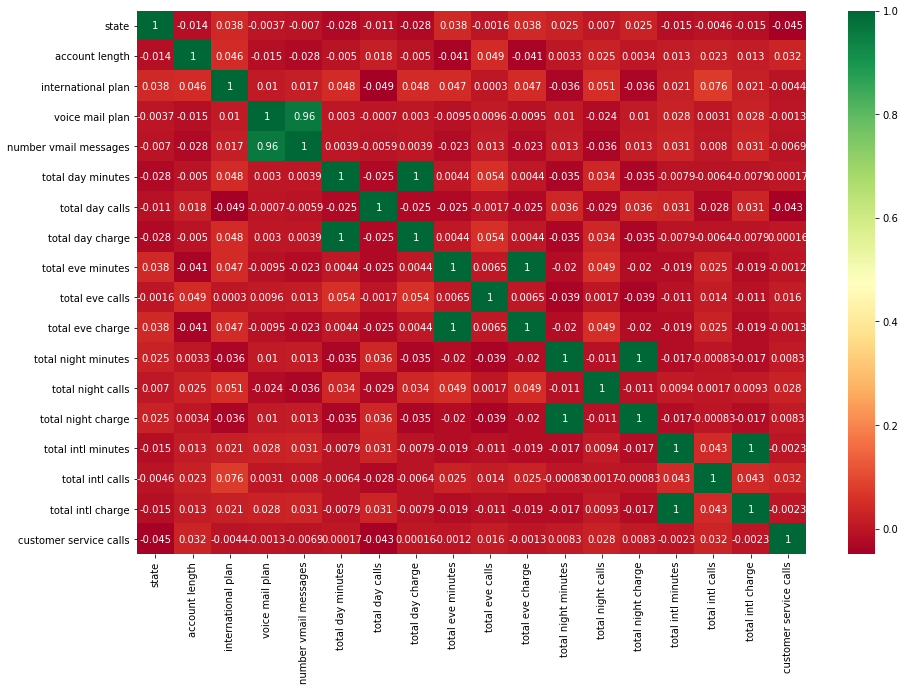

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn')

#so from the below graph we can interpret that most of the values are below averagely correlated amongst each other

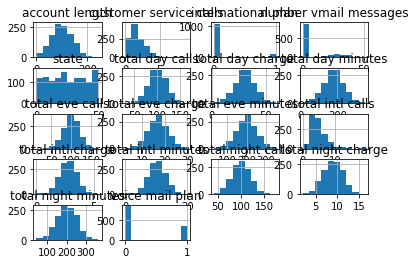

In [32]:
%matplotlib inline
x.hist()
plt.show()

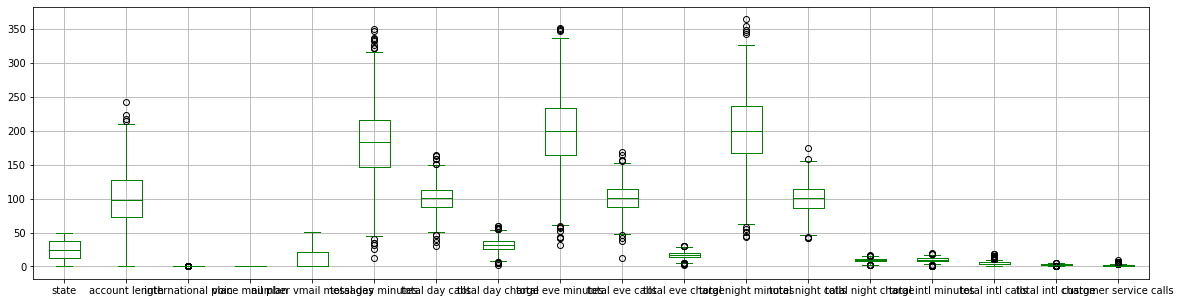

In [33]:
x.boxplot(figsize=(20,5),color='green')      #shows outliers are present in each column

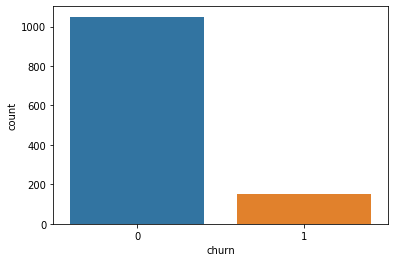

In [34]:
sns.countplot(df['churn'])  #count of churned or not

In [35]:
df.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

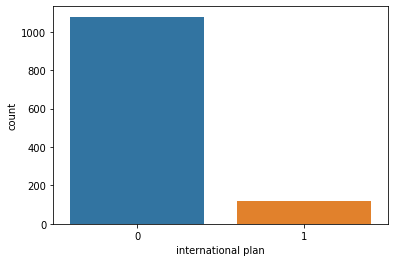

In [36]:
sns.countplot(df['international plan'])  #count of male and female

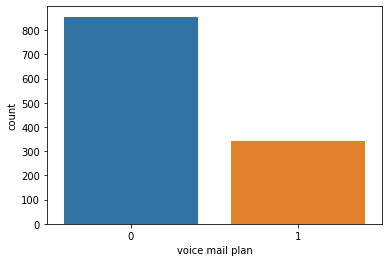

In [37]:
sns.countplot(df['voice mail plan'])  #count of male and female

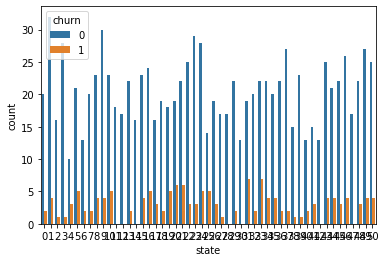

In [38]:
sns.countplot(df['state'],hue=df['churn'])

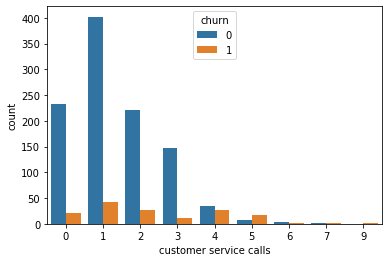

In [42]:
sns.countplot(df['customer service calls'],hue=df['churn'])

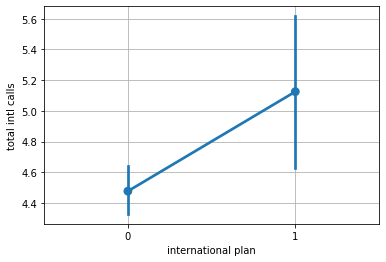

In [49]:
sns.pointplot(x['international plan'],x['total intl calls'])
plt.xlabel('international plan')
plt.ylabel('total intl calls')
plt.grid()

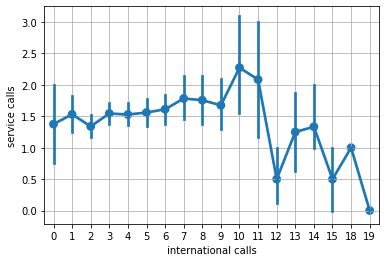

In [51]:
sns.pointplot(x['total intl calls'],x['customer service calls'])
plt.xlabel('international calls')
plt.ylabel('service calls')
plt.grid()

In [52]:
#removing outliers

In [54]:
from scipy.stats import zscore

In [55]:
z=(np.abs(zscore(x)))

In [56]:
threshold=3
print(np.where(z>3))

(array([  22,   32,   32,   41,   58,  115,  115,  179,  179,  185,  244,
        244,  272,  301,  314,  314,  332,  343,  343,  365,  365,  377,
        416,  468,  483,  488,  488,  493,  522,  542,  595,  595,  636,
        642,  646,  674,  692,  694,  712,  712,  721,  740,  756,  762,
        762,  778,  817,  837,  845,  854,  863,  878,  878,  883,  883,
        902,  908,  921,  922,  922,  957,  960,  974,  982,  985,  985,
       1028, 1028, 1052, 1052, 1080, 1080, 1092, 1113, 1113, 1121, 1142,
       1144, 1179], dtype=int64), array([15,  8, 10, 15,  9, 14, 16, 14, 16, 15, 11, 13, 15,  9, 14, 16, 17,
       14, 16,  5,  7, 15,  1,  6, 15, 14, 16, 12, 17, 17, 14, 16, 15, 15,
        9, 15,  6, 17, 14, 16, 17,  6, 15, 14, 16, 17,  1, 15,  4, 15, 15,
       14, 16, 11, 13, 17, 17, 15, 11, 13, 15,  9, 17, 15,  5,  7, 14, 16,
        5,  7, 14, 16, 15, 11, 13,  6, 17,  6, 15], dtype=int64))


In [57]:
x_new=x[(z<3).all(axis=1)]

In [58]:
x_new.shape

(1139, 18)

In [59]:
x.shape

(1199, 18)

In [60]:
#so we can see from the above that outliers with threshold as 3 has been removed

In [61]:
#performing the satndardization will bring mean to 0 and standard deviation,variance to unit

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std=StandardScaler()

In [64]:
x=std.fit_transform(x)

In [65]:
x=pd.DataFrame(data=x)

In [66]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.608588,0.695114,-0.333488,1.579755,1.211844,1.536406,0.485791,1.536685,-0.035977,-0.050585,-0.035795,0.876549,-0.453458,0.875902,-0.078398,-0.604922,-0.079101,-0.414434
1,0.669340,0.171470,-0.333488,1.579755,1.284665,-0.371483,1.143485,-0.371757,-0.072204,0.148762,-0.071685,1.065606,0.150034,1.066479,1.230581,-0.604922,1.231238,-0.414434
2,0.400303,0.919533,-0.333488,-0.633009,-0.608685,1.136394,0.688158,1.136563,-1.488861,0.497620,-1.489351,-0.723612,0.200325,-0.722342,0.699914,0.180036,0.693999,-1.178904
3,0.669340,-0.402045,2.998611,-0.633009,-0.608685,2.168682,-1.487289,2.168857,-2.619518,-0.598790,-2.619894,-0.055092,-0.554040,-0.055324,-1.281242,0.964994,-1.284614,0.350037
4,0.736600,-0.626464,2.998611,-0.633009,-0.608685,-0.277471,0.637566,-0.277419,-0.972153,1.095662,-0.971185,-0.249996,1.055272,-0.250232,-0.043020,-0.604922,-0.039791,1.114508


In [72]:
#minimising the number of columns from 18 to 10 using PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA(n_components=9)

In [75]:
x=pca.fit_transform(x)

In [76]:
x=pd.DataFrame(data=x)

In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1199 non-null   float64
 1   1       1199 non-null   float64
 2   2       1199 non-null   float64
 3   3       1199 non-null   float64
 4   4       1199 non-null   float64
 5   5       1199 non-null   float64
 6   6       1199 non-null   float64
 7   7       1199 non-null   float64
 8   8       1199 non-null   float64
dtypes: float64(9)
memory usage: 84.4 KB


In [78]:
#performing analysis with various models

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [80]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.875
accuracy score corrosponding to random state: 43 is: 0.875
accuracy score corrosponding to random state: 44 is: 0.8916666666666667
accuracy score corrosponding to random state: 45 is: 0.8666666666666667
accuracy score corrosponding to random state: 46 is: 0.9
accuracy score corrosponding to random state: 47 is: 0.9125
accuracy score corrosponding to random state: 48 is: 0.8958333333333334
accuracy score corrosponding to random state: 49 is: 0.8833333333333333
accuracy score corrosponding to random state: 50 is: 0.8708333333333333
accuracy score corrosponding to random state: 51 is: 0.8916666666666667
accuracy score corrosponding to random state: 52 is: 0.8916666666666667
accuracy score corrosponding to random state: 53 is: 0.8875
accuracy score corrosponding to random state: 54 is: 0.9291666666666667
accuracy score corrosponding to random state: 55 is: 0.8708333333333333
accuracy score corrosponding to random state: 56 is: 0.9


Logistic regression is giving a max of 93% accuracy result, but we will check with other models too.

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       220
           1       0.00      0.00      0.00        20

    accuracy                           0.90       240
   macro avg       0.46      0.49      0.47       240
weighted avg       0.84      0.90      0.87       240



In [83]:
confusion_matrix(y_test,pred)

array([[217,   3],
       [ 20,   0]], dtype=int64)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,test_size=0.20)

In [84]:
#working with knn classifier
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.9
accuracy score for neighbors 2 is: 0.925
accuracy score for neighbors 3 is: 0.9291666666666667
accuracy score for neighbors 4 is: 0.9333333333333333
accuracy score for neighbors 5 is: 0.9416666666666667
accuracy score for neighbors 6 is: 0.9333333333333333
accuracy score for neighbors 7 is: 0.9333333333333333
accuracy score for neighbors 8 is: 0.925
accuracy score for neighbors 9 is: 0.9291666666666667
accuracy score for neighbors 10 is: 0.925
accuracy score for neighbors 11 is: 0.925
accuracy score for neighbors 12 is: 0.925
accuracy score for neighbors 13 is: 0.925
accuracy score for neighbors 14 is: 0.9208333333333333
accuracy score for neighbors 15 is: 0.9208333333333333
accuracy score for neighbors 16 is: 0.9208333333333333
accuracy score for neighbors 17 is: 0.9208333333333333
accuracy score for neighbors 18 is: 0.9208333333333333
accuracy score for neighbors 19 is: 0.9208333333333333
accuracy score for neighbors 20 is: 0.9208333333333333
cr

In [85]:
#knn classifier is giving a max accuracy score of 93% at n_neighbors=3

In [111]:
#using gaussianNB algorithm

In [112]:
gb=GaussianNB()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)

In [113]:
accuracy_score(y_test,predgb)

0.9166666666666666

In [114]:
#gaussian naive bayes is giving a maximum of 92% accuracy score

In [86]:
a=['gini','entropy']
for i in a:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print("accuracy score with criterion as",i,"is:",accuracy_score(y_test,preddtc))

accuracy score with criterion as gini is: 0.8458333333333333
accuracy score with criterion as entropy is: 0.8875


In [87]:
#dtc is giving a maximum odf 89% accuracy score 

In [89]:
#using GridsearchCV to find the best hyperparameter for SVC

In [92]:
svc=SVC()

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param={'kernel':('linear','rbf','poly'),'C':[0,1,10]}

In [93]:
gd=GridSearchCV(estimator=svc,param_grid=param)

In [94]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
gd.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
gd.best_params_

{'C': 10, 'kernel': 'rbf'}

In [97]:
gd.best_score_

0.8999267782426779

In [98]:
#so from SVC we are getting a maximum of 90% accuracy 

In [99]:
#now will try to increase the accuracy score with ensemble techniues

In [100]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [128]:
#using random forest classifier for different number of n_estimators
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestClassifier(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('accuracy score at',i,'is:',accuracy_score(y_test,predrd))

accuracy score at 150 is: 0.95
accuracy score at 200 is: 0.9458333333333333
accuracy score at 250 is: 0.95
accuracy score at 300 is: 0.9458333333333333
accuracy score at 350 is: 0.95


In [102]:
#so we can from the above model that randomforest classifier is giving a max of 95.4 % accuracy score at n_estimator of 350

In [103]:
#using Gradient boost classifier at different learning rates
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingClassifier(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predgd))

accuracy score at 0.1 is: 0.9291666666666667
accuracy score at 0.01 is: 0.9375
accuracy score at 1.0 is: 0.9083333333333333


In [104]:
#Gradient boost classifier is giving a max of 93.75% accuracy score at l_rate=1

In [127]:
#using adaboost classiers at different n_estimator
a=[100,200,50,150]
for i in a:
    ad=AdaBoostClassifier(n_estimators=i)
    ad.fit(x_train,y_train)
    predad=ad.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predad))
    

accuracy score at 100 is: 0.9166666666666666
accuracy score at 200 is: 0.9125
accuracy score at 50 is: 0.9166666666666666
accuracy score at 150 is: 0.9208333333333333


In [117]:
#adaboost classifier is giving a max of 92% accuracy

In [160]:
results={'models':('Logistic Regeression','GaussianNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier'),'Accuracy Score':[92.9,92.5,91.6,90,89,95.41,93.75,92]}

In [161]:
a=pd.DataFrame(data=results)

In [162]:
a

,models,Accuracy Score
0,Logistic Regeression,92.90
1,GaussianNB,92.50
2,KNeighborsClassifier,91.60
3,SVC,90.00
4,DecisionTreeClassifier,89.00
5,RandomForestClassifier,95.41
6,GradientBoostingClassifier,93.75
7,AdaBoostClassifier,92.00


#from the above we can conclude that Random Forest Classifier is giving a maximum of accuracy score, so will finalise the model and dump this model using serialisation

In [121]:
#finalizing the model

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,test_size=0.20)

In [159]:
rd=RandomForestClassifier(n_estimators=300)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
a1=pd.DataFrame(data=predrd)
a1.to_csv('customerchurn.csv')
print('accuracy score is:',accuracy_score(y_test,predrd))

accuracy score is: 0.9541666666666667


In [163]:
print(classification_report(y_test,predrd))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       220
           1       0.91      0.50      0.65        20

    accuracy                           0.95       240
   macro avg       0.93      0.75      0.81       240
weighted avg       0.95      0.95      0.95       240



In [164]:
confusion_matrix(y_test,predrd)

array([[219,   1],
       [ 10,  10]], dtype=int64)

In [138]:
#we can see the type 1 and type 2 error from the above matrix

In [140]:
#plotting auc roc curve

In [141]:
from sklearn.metrics import roc_auc_score,roc_curve

In [142]:
y_pred_prob=rd.predict_proba(x_test)[:,1]

In [143]:
y_pred_prob

array([0.06 , 0.235, 0.085, 0.45 , 0.205, 0.05 , 0.005, 0.1  , 0.005,
       0.105, 0.125, 0.295, 0.065, 0.235, 0.065, 0.02 , 0.21 , 0.035,
       0.215, 0.03 , 0.075, 0.13 , 0.075, 0.17 , 0.18 , 0.09 , 0.035,
       0.085, 0.08 , 0.035, 0.545, 0.085, 0.14 , 0.005, 0.085, 0.06 ,
       0.195, 0.04 , 0.125, 0.065, 0.015, 0.135, 0.52 , 0.025, 0.04 ,
       0.355, 0.025, 0.04 , 0.115, 0.085, 0.145, 0.09 , 0.11 , 0.015,
       0.035, 0.045, 0.025, 0.305, 0.015, 0.08 , 0.035, 0.005, 0.07 ,
       0.14 , 0.06 , 0.065, 0.255, 0.085, 0.06 , 0.78 , 0.01 , 0.095,
       0.015, 0.145, 0.125, 0.095, 0.03 , 0.6  , 0.105, 0.1  , 0.055,
       0.05 , 0.28 , 0.045, 0.005, 0.085, 0.07 , 0.06 , 0.01 , 0.24 ,
       0.09 , 0.04 , 0.205, 0.   , 0.005, 0.175, 0.145, 0.115, 0.075,
       0.325, 0.015, 0.02 , 0.13 , 0.065, 0.125, 0.055, 0.1  , 0.03 ,
       0.075, 0.02 , 0.21 , 0.345, 0.   , 0.505, 0.05 , 0.05 , 0.43 ,
       0.225, 0.33 , 0.115, 0.06 , 0.14 , 0.135, 0.825, 0.14 , 0.125,
       0.285, 0.025,

In [144]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

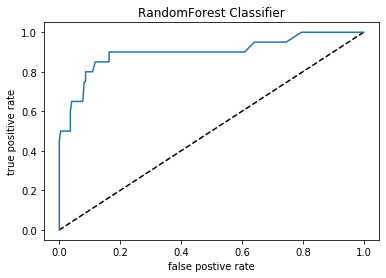

In [146]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("RandomForest Classifier")
plt.show()

In [147]:
#dumping the final model using serialisation

In [165]:
import joblib

In [166]:
joblib.dump(rd,'customer_churn.obj')

['customer_churn.obj']